<a href="https://colab.research.google.com/github/haroonkhan-123/EdTech-Startup-Dashboard/blob/main/flight_series_airpassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Loading the dataset
df=sns.load_dataset("flights")
df['yearMonth']=pd.to_datetime('01-'+ df['month'].astype(str)+ "-"+ df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

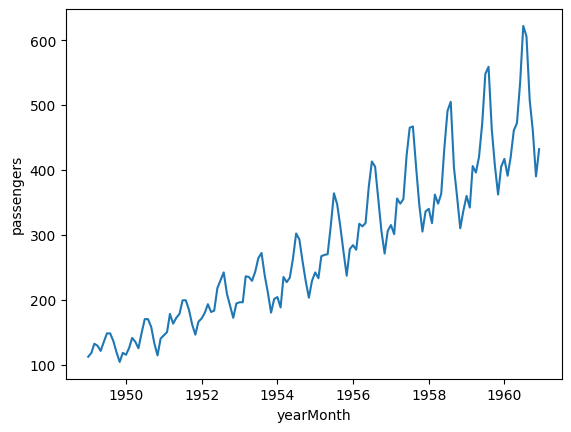

In [ ]:
## Now we creating line chart
sns.lineplot(data=df,x=df.index,y=df.passengers)

In [ ]:
##Now we apply rolling statistics
df['rollMean']=df.passengers.rolling(window=12).mean()
df['rollStd']= df.passengers.rolling(window=12).std()

<Axes: xlabel='yearMonth', ylabel='passengers'>

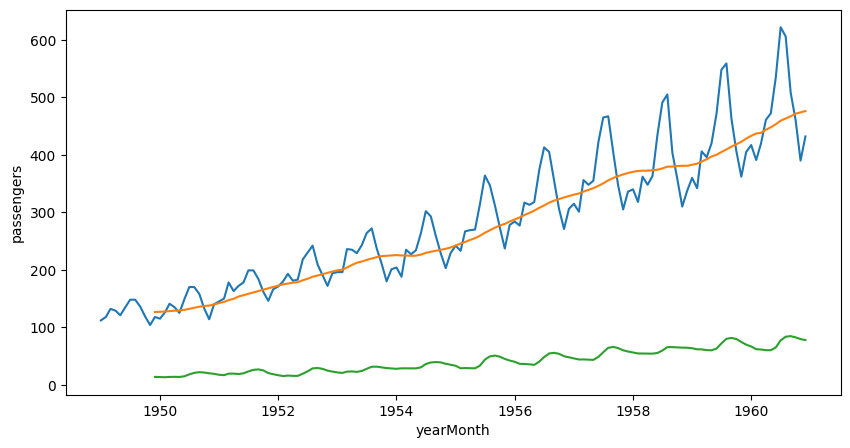

In [ ]:
## Now we create the plot to visualize this
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df, x= df.index,y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)

In [ ]:
## Now we apply another test which is ADF TEST
## Importing model
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfTest=adfuller(df['passengers'],autolag='AIC',)

In [ ]:
## Now we see what are the values we getting related to this adf
adfTest

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [ ]:
stats=pd.Series(adfTest[0:4],index=['Test Statistic','p value','#Lags Used','number of observations used'])
stats

,0
Test Statistic,0.815369
p value,0.991880
#Lags Used,13.000000
number of observations used,130.000000


In [ ]:
## Now we deal with criticality
for key , values  in adfTest[4].items():
  print("criticality",key ,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


In [ ]:
## Now we see how we make data stationary
air_df= df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
## Now we create the function which checks  stationarirty again and again
def test_stationarity(dataframe , var):
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  adfTest=adfuller(dataframe[var],autolag='AIC')
  stats=pd.Series(adfTest[0:4],index=['Test Statistics','p-value','#lags used','number of observation used'])
  print(stats)
  for key, values in adfTest[4].items():
    print("criticality",key,":",values)
    ## Plotting
    sns.lineplot(data=dataframe,x=dataframe.index,y=var)
    sns.lineplot(data=dataframe,x=dataframe.index, y="rollMean")
    sns.lineplot(data=dataframe,x=dataframe.index, y='rollStd')

Test Statistics                 0.815369
p-value                         0.991880
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


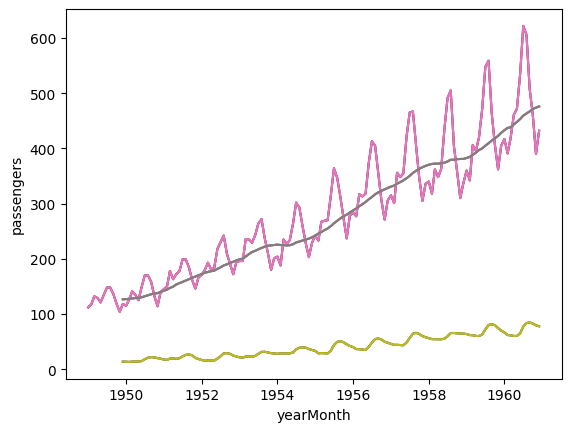

In [ ]:
## Calling the function
test_stationarity(df,"passengers")

In [ ]:
## Taking passengers column
air_df= df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
## Time shift
air_df['shift']= air_df.passengers.shift()
## Taking the difference
air_df['shiftDiff']=air_df.passengers-air_df['shift']
air_df.head()

<ipython-input-15-7ae97506b9e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift']= air_df.passengers.shift()
<ipython-input-15-7ae97506b9e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff']=air_df.passengers-air_df['shift']


,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


<ipython-input-12-597f36c7078c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
<ipython-input-12-597f36c7078c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()


Test Statistics                -2.829267
p-value                         0.054213
#lags used                     12.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


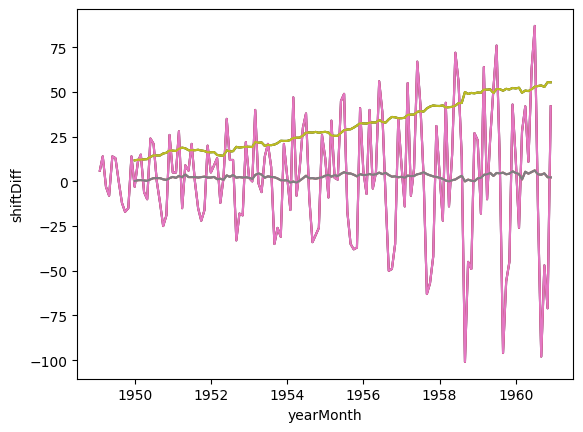

In [ ]:
## Now we again check the stationarity
test_stationarity(air_df.dropna(),'shiftDiff')

In [ ]:
##  There is second method which is log transformation
log_df=df[['passengers']]
log_df['log']=np.log(log_df['passengers'])
log_df.head()

<ipython-input-17-0e75ea3afd1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log']=np.log(log_df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


<ipython-input-12-597f36c7078c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
<ipython-input-12-597f36c7078c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()


Test Statistics                -1.717017
p-value                         0.422367
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


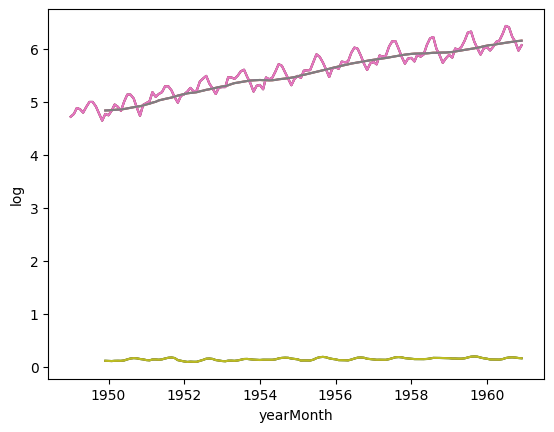

In [ ]:
## Again we calling the function
test_stationarity(log_df,'log')

In [ ]:
## Third step is to check stationarity
sqrt_df=df[['passengers']]
sqrt_df['sqrt']=np.sqrt(df['passengers'])
sqrt_df.head()

<ipython-input-19-4470f24db4ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt']=np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


<ipython-input-12-597f36c7078c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
<ipython-input-12-597f36c7078c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()


Test Statistics                -0.345854
p-value                         0.918754
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


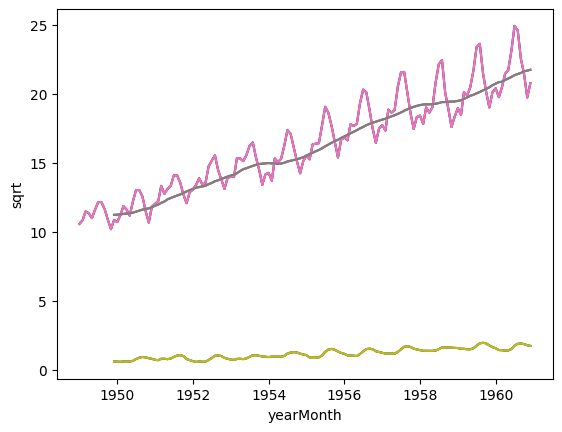

In [ ]:
## Calling the function to check the stationarity
test_stationarity(sqrt_df,'sqrt')

In [ ]:
## Now we using the cube root
cbrt_df=df[['passengers']]
cbrt_df['cbrt']=np.cbrt(df['passengers'])
cbrt_df.head()

<ipython-input-21-4224cde8bc17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt']=np.cbrt(df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


<ipython-input-12-597f36c7078c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
<ipython-input-12-597f36c7078c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()


Test Statistics                -0.810035
p-value                         0.816157
#lags used                     13.000000
number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


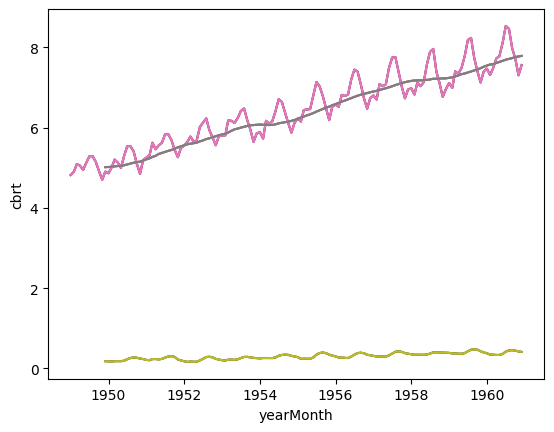

In [ ]:
### Calling the the function
test_stationarity(cbrt_df,'cbrt')

In [ ]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt']=np.sqrt(log_df['log'])
log_df2['logsShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()



<ipython-input-23-ce6c4d0edcce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt']=np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logsShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


<ipython-input-12-597f36c7078c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean']=dataframe[var].rolling(window=12).mean()
<ipython-input-12-597f36c7078c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd']=dataframe[var].rolling(window=12).std()


Test Statistics                -2.611019
p-value                         0.090741
#lags used                     14.000000
number of observation used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


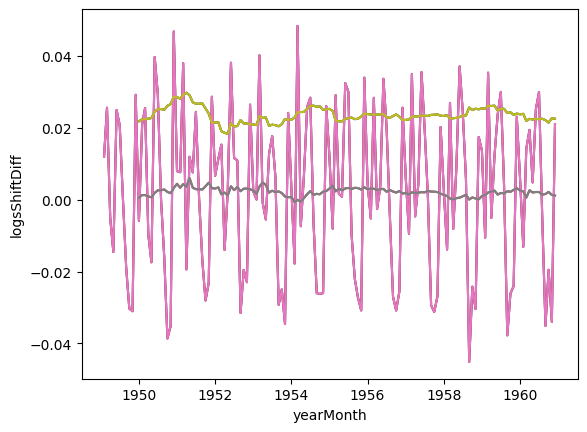

In [ ]:
test_stationarity(log_df2.dropna(),'logsShiftDiff')

**STEP- 2**

In [ ]:
airP=df[['passengers']].copy(deep=True)
airP['firstDiff']=airP['passengers'].diff()
airP['Diff12']= airP['passengers'].diff(12)

In [ ]:
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [ ]:
## Now we bulid the ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

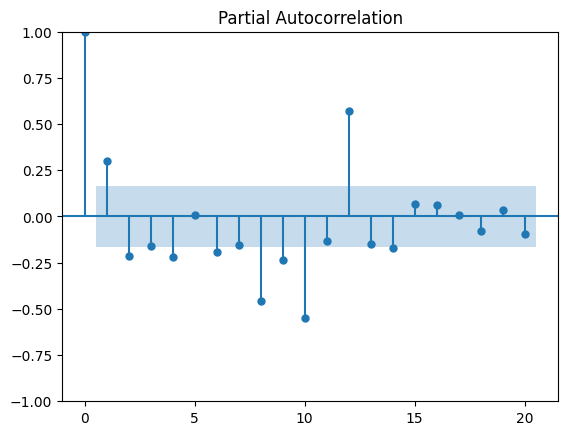

In [ ]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

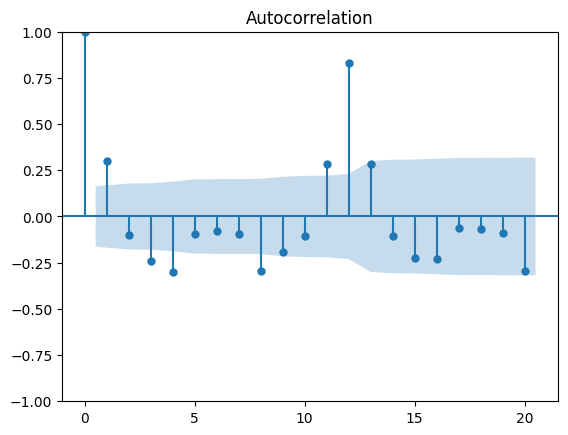

In [ ]:
plot_acf( airP['firstDiff'].dropna(),lags=20);

In [ ]:
# p=1, q=3,d =1

In [ ]:
## Divide into Train and test split
train=airP[:round(len(airP)*70/100)]
test=airP[round(len(airP)*70/100):]
test.head()


,passengers,firstDiff,Diff12
yearMonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model using the new API
model = ARIMA(train['passengers'], order=(1, 1, 3))
model_fit = model.fit()

# Make predictions
prediction = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')  # Use typ='levels' after differencing
airP['arimaPred']=prediction
airP.tail()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

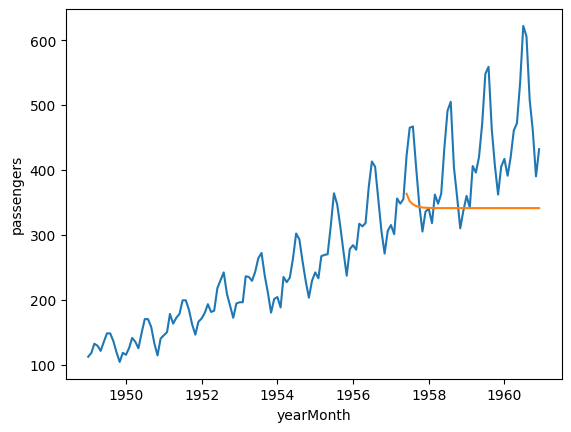

In [ ]:
airP.dropna()
sns.lineplot( data=airP , x=airP.index, y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

np.float64(111.11010332607138)

In [ ]:
## Applying Another Model which SRIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

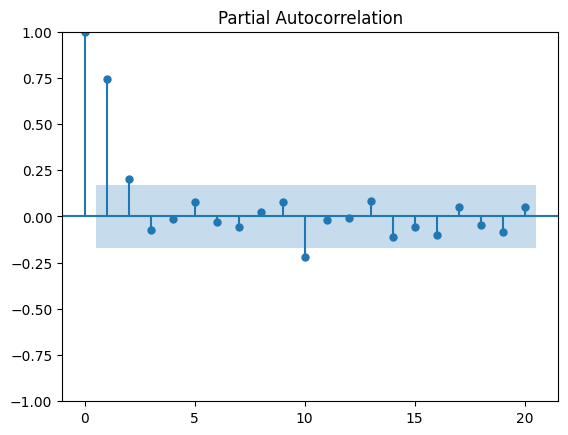

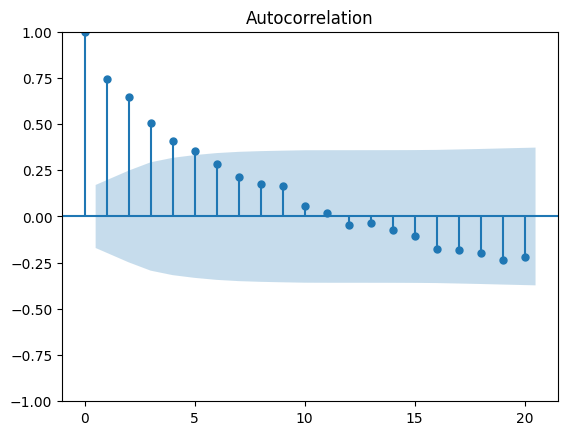

In [ ]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);

In [ ]:
model=SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit=model.fit()
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])
airP['srimaxPred']=prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
airP.tail()

,passengers,firstDiff,Diff12,arimaPred,srimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,598.353416
1960-09-01,508,-98.0,45.0,341.111333,533.984427
1960-10-01,461,-47.0,54.0,341.111333,478.758682
1960-11-01,390,-71.0,28.0,341.111333,431.404809
1960-12-01,432,42.0,27.0,341.111333,476.767010


<Axes: xlabel='yearMonth', ylabel='passengers'>

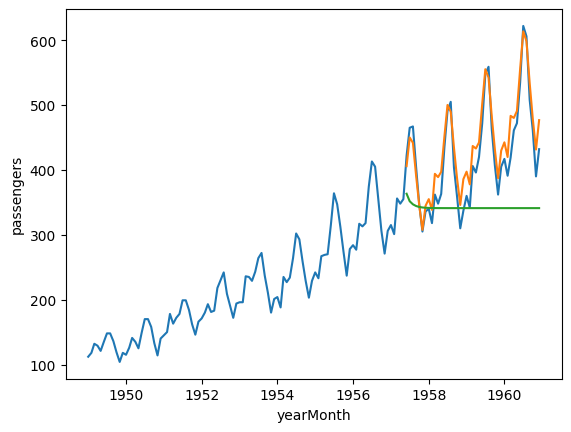

In [ ]:
## Creating the plots
airP.dropna()
sns.lineplot(data=airP,x=airP.index, y='passengers')
sns.lineplot(data=airP , x=airP.index, y='srimaxPred')
sns.lineplot(data=airP ,x=airP.index, y='arimaPred')

In [ ]:
## Finding the error
np.sqrt(mean_squared_error(test['passengers'],prediction))

np.float64(27.476033427114835)

In [ ]:
## For Future prediction we use  last date
airP.tail()

,passengers,firstDiff,Diff12,arimaPred,srimaxPred
yearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,598.353416
1960-09-01,508,-98.0,45.0,341.111333,533.984427
1960-10-01,461,-47.0,54.0,341.111333,478.758682
1960-11-01,390,-71.0,28.0,341.111333,431.404809
1960-12-01,432,42.0,27.0,341.111333,476.767010


In [ ]:
futureDates=pd.DataFrame(pd.date_range(start='1960-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDates.set_index('Dates',inplace=True)
futureDates.head()

""
Dates
1960-01-01
1960-02-01
1960-03-01
1960-04-01
1960-05-01


In [ ]:
## Now we make predictions on future dates
model_fit.predict(start=futureDates.index[0],end=futureDates.index[-1])

,predicted_mean
1960-01-01,442.517325
1960-02-01,419.938354
1960-03-01,483.341095
1960-04-01,480.134395
1960-05-01,490.785455
1960-06-01,555.880261
1960-07-01,613.622964
1960-08-01,598.353416
1960-09-01,533.984427
1960-10-01,478.758682


<Axes: >

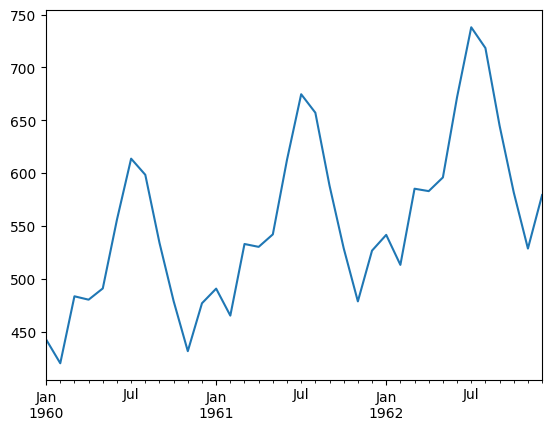

In [ ]:
## Plot this future dates
model_fit.predict(start=futureDates.index[0],end=futureDates.index[-1]).plot()

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


<Axes: xlabel='yearMonth', ylabel='passengers'>

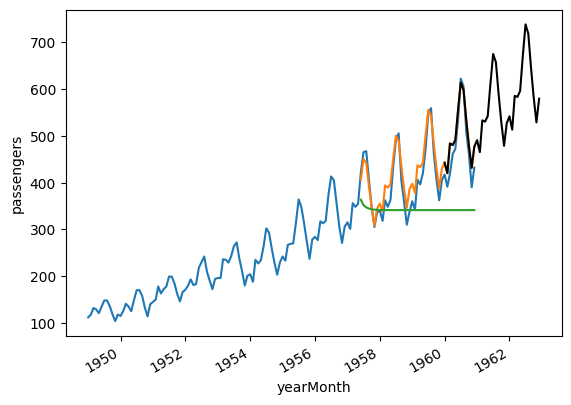

In [ ]:
## NOw we combine them and see the results
airP.dropna()
sns.lineplot(data=airP,x=airP.index, y='passengers')
sns.lineplot(data=airP , x=airP.index, y='srimaxPred')
sns.lineplot(data=airP ,x=airP.index, y='arimaPred')
model_fit.predict(start=futureDates.index[0],end=futureDates.index[-1]).plot(color='black')